#                         California Housing Price Prediction 

###  Description

### Background of Problem Statement :

##### The US Census Bureau has published California Census Data which has 10 types of metrics such as the population, median
##### income, median housing price, and so on for each block group in California. The dataset also serves as an input for project 
##### scoping and tries to specify the functional and nonfunctional requirements for it.

### Problem Objective :

##### The project aims at building a model of housing prices to predict median house values in California using the
##### provided dataset. This model should learn from the data and be able to predict the median housing price in
##### any district, given all the other metrics.

##### Districts or block groups are the smallest geographical units for which the US Census Bureau
##### publishes sample data (a block group typically has a population of 600 to 3,000 people). There are 20,640 
#####  districts in the project dataset.

### Domain: Finance and Housing

#### Analysis Tasks to be performed:

#### 1. Build a model of housing prices to predict median house values in California using the provided dataset.

#### 2. Train the model to learn from the data to predict the median housing price in any district, given all the other ### metrics.

#### 3. Predict housing prices based on median_income and plot the regression chart for it.

#### 1. Load the data :

##### Read the “housing.csv” file from the folder into the program.
##### Print first few rows of this data.
##### Extract input (X) and output (Y) data from the dataset.
#### 2. Handle missing values :

##### Fill the missing values with the mean of the respective column.
##### 3. Encode categorical data :

##### Convert categorical column in the dataset to numerical data.
#### 4. Split the dataset : 

#### Split the data into 80% training dataset and 20% test dataset.
#### 5. Standardize data :

#### Standardize training and test datasets.
#### 6. Perform Linear Regression : 

###### Perform Linear Regression on training data.
###### Predict output for test dataset using the fitted model.
###### Print root mean squared error (RMSE) from Linear Regression. [ HINT: Import mean_squared_error from  sklearn.metrics ]

#### 7. Bonus exercise: Perform Linear Regression with one independent variable :

##### Extract just the median_income column from the independent variables (from X_train and X_test).
##### Perform Linear Regression to predict housing values based on median_income.
##### Predict output for test dataset using the fitted model.
##### Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data.

### Dataset Description :

#### Field	Description
##### longitude	(signed numeric - float) : Longitude value for the block in California, USA
##### latitude	(numeric - float ) : Latitude value for the block in California, USA
##### housing_median_age	(numeric - int ) : Median age of the house in the block
##### total_rooms	(numeric - int ) : Count of the total number of rooms (excluding bedrooms) in all houses in the block
##### total_bedrooms	(numeric - float ) : Count of the total number of bedrooms in all houses in the block
##### population	(numeric - int ) : Count of the total number of population in the block
##### households	(numeric - int ) : Count of the total number of households in the block
##### median_income	(numeric - float ) : Median of the total household income of all the houses in the block
##### ocean_proximity	(numeric - categorical ) : Type of the landscape of the block 
##### [ Unique Values : 'NEAR BAY',  '<1H OCEAN','INLAND', 'NEAR OCEAN', 'ISLAND'  ]
##### median_house_value	(numeric - int ) : Median of the household prices of all the houses in the block

In [136]:
#!pip install -U notebook-as-pdf

In [135]:
#!pyppeteer-install

In [6]:
import matplotlib 
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
from sklearn import preprocessing

In [112]:
import os

In [131]:
os.getcwd()

'C:\\Users\\yanli'

# 1. Load the data:

### Read the "housing.csv" file from the folder into the program.

In [150]:
#import data and split it into feature and label
houseData = pd.read_csv('D:/job/AI & ML/Project 1/1553768847_housing.csv')

### Print first few rows of this data.

In [151]:
houseData.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [152]:
houseData.shape

(20640, 10)

## 2. Handle Missing Values

In [153]:
# count of missing values
houseData.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

array([[<AxesSubplot:title={'center':'total_bedrooms'}>]], dtype=object)

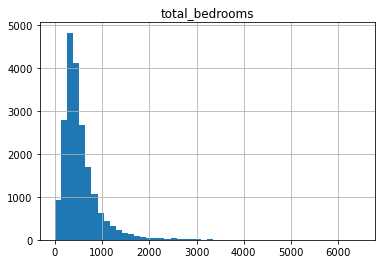

In [154]:
houseData.hist(column='total_bedrooms',bins=50)

<AxesSubplot:>

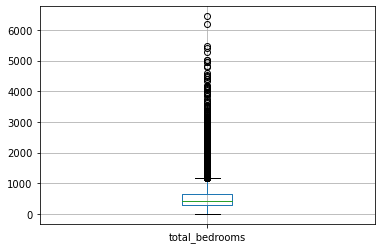

In [155]:
houseData.boxplot(column='total_bedrooms')

In [156]:
houseData.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

## 2. Handle missing values :

In [157]:
from sklearn.impute import SimpleImputer

### Fill the missing values with the mean of the respective column

In [158]:
imp=SimpleImputer(missing_values=np.nan,strategy='mean')

In [159]:
houseData['total_bedrooms']=imp.fit_transform(houseData[['total_bedrooms']])

In [160]:
houseData.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [161]:
houseData['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

## 3. Eoncode Categorical data
#### Convert categorical column in the dataset to numerical data.

In [162]:
dummy=pd.get_dummies(houseData['ocean_proximity'])
dummy.head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [163]:
pd.concat([houseData,dummy],axis=1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100,0,1,0,0,0
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100,0,1,0,0,0
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300,0,1,0,0,0
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700,0,1,0,0,0


In [164]:
df=pd.concat([houseData,dummy],axis=1)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200,0,0,0,1,0


In [165]:
#remove ocean_proximity from df
df.drop('ocean_proximity',axis=1,inplace=True)

In [166]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0,0,0,1,0


In [167]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069260,0.099773,0.055310,-0.015176,-0.045967,0.321121,-0.055575,0.009446,-0.474489,0.045509
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066658,-0.108785,-0.071035,-0.079809,-0.144160,-0.446969,0.351166,-0.016572,0.358771,-0.160818
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.318998,-0.296244,-0.302916,-0.119034,0.105623,0.045300,-0.236645,0.017020,0.255172,0.021622
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927253,0.857126,0.918484,0.198050,0.134153,-0.003031,0.025624,-0.007572,-0.023022,-0.009175
total_bedrooms,0.069260,-0.066658,-0.318998,0.927253,1.000000,0.873910,0.974725,-0.007682,0.049454,0.018220,-0.006433,-0.004361,-0.019785,0.000676
population,0.099773,-0.108785,-0.296244,0.857126,0.873910,1.000000,0.907222,0.004834,-0.024650,0.074613,-0.020732,-0.010412,-0.060880,-0.024264
households,0.055310,-0.071035,-0.302916,0.918484,0.974725,0.907222,1.000000,0.013033,0.065843,0.042435,-0.039402,-0.009077,-0.010093,0.001714
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007682,0.004834,0.013033,1.000000,0.688075,0.168876,-0.237496,-0.009228,0.056197,0.027344
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049454,-0.024650,0.065843,0.688075,1.000000,0.256617,-0.484859,0.023416,0.160284,0.141862
<1H OCEAN,0.321121,-0.446969,0.045300,-0.003031,0.018220,0.074613,0.042435,0.168876,0.256617,1.000000,-0.607669,-0.013872,-0.314813,-0.342620


In [168]:
#corr for the mdedain house value 

In [169]:
df.corr()['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
<1H OCEAN             0.256617
NEAR BAY              0.160284
NEAR OCEAN            0.141862
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049454
ISLAND                0.023416
population           -0.024650
longitude            -0.045967
latitude             -0.144160
INLAND               -0.484859
Name: median_house_value, dtype: float64

In [170]:
import seaborn as sns 

In [171]:
plt.figure(figsize=(20,20),facecolor='red',edgecolor='blue')

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<AxesSubplot:>

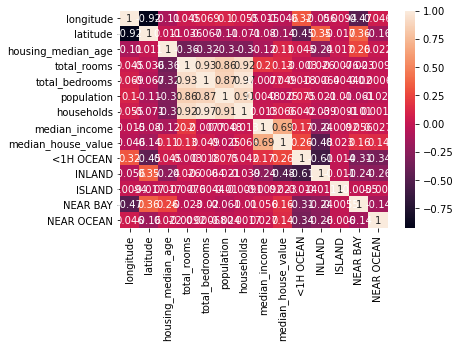

In [172]:
sns.heatmap(df.corr(),annot=True)

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>,
        <AxesSubplot:title={'center':'total_rooms'}>],
       [<AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>,
        <AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>],
       [<AxesSubplot:title={'center':'median_house_value'}>,
        <AxesSubplot:title={'center':'<1H OCEAN'}>,
        <AxesSubplot:title={'center':'INLAND'}>,
        <AxesSubplot:title={'center':'ISLAND'}>],
       [<AxesSubplot:title={'center':'NEAR BAY'}>,
        <AxesSubplot:title={'center':'NEAR OCEAN'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

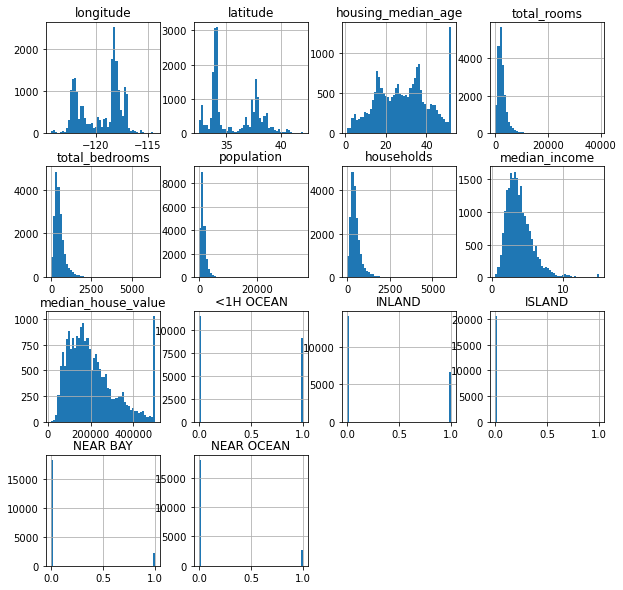

In [173]:
df.hist(figsize=(10,10),bins=50)


## Extract input (X) and output (Y) data from the datase

In [174]:
# drop median price 
x=df.drop('median_house_value',axis=1)

In [175]:
x.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,0,0,0,1,0


In [176]:
y=df['median_house_value']

In [177]:
y.head()

0    452600
1    358500
2    352100
3    341300
4    342200
Name: median_house_value, dtype: int64

## 4. Split the dataset : 



In [178]:
from sklearn.preprocessing import StandardScaler

In [179]:
from sklearn.model_selection import train_test_split

#### Split the data into 80% training dataset and 20% test dataset.

In [180]:
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

## 5. Standardize data :

###  Standardize training and test datasets

In [181]:
#scale the independent variables on the training data
scaler=StandardScaler()

In [182]:
x_train_sc=scaler.fit_transform(x_train)

In [183]:
x_train_sc.mean(axis=0)

array([ 3.30936828e-15,  1.42543169e-15,  1.97946741e-17, -3.22739251e-19,
       -2.17526255e-16, -6.88510403e-17, -1.72127601e-17, -6.02446603e-18,
        3.78680722e-17, -2.25917476e-17, -1.50073752e-17,  1.31247296e-17,
        4.75502497e-17])

In [184]:
x_train_sc.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [185]:
x_train_sc

array([[ 1.52346202, -0.85071881, -0.60284716, ..., -0.01740407,
        -0.35283033, -0.38255488],
       [-1.6764423 ,  1.33721733,  1.37738127, ..., -0.01740407,
        -0.35283033, -0.38255488],
       [-1.45214994,  0.93048561,  0.18924421, ..., -0.01740407,
        -0.35283033,  2.61400403],
       ...,
       [-1.10325072,  0.78555822, -1.79098421, ..., -0.01740407,
        -0.35283033, -0.38255488],
       [ 0.67115105, -0.77591757,  0.50608076, ..., -0.01740407,
        -0.35283033, -0.38255488],
       [-1.14810919,  0.77620806, -0.99889284, ..., -0.01740407,
        -0.35283033, -0.38255488]])

In [186]:
x_test_sc=scaler.transform(x_test)

In [203]:
x_test_sc

array([[ 0.19764496, -0.69176618, -1.31572939, ..., -0.01740407,
        -0.35283033,  2.61400403],
       [-1.362433  ,  0.893085  , -0.12759233, ..., -0.01740407,
        -0.35283033,  2.61400403],
       [ 0.90042769, -0.92084497, -1.31572939, ..., -0.01740407,
        -0.35283033, -0.38255488],
       ...,
       [-1.37738582,  1.09411332,  0.34766249, ..., -0.01740407,
         2.83422348, -0.38255488],
       [ 0.64622968, -0.77591757,  1.29817213, ..., -0.01740407,
        -0.35283033, -0.38255488],
       [ 0.68610388, -0.6683908 ,  0.90212645, ..., -0.01740407,
        -0.35283033, -0.38255488]])

## 6. Perform Linear Regression : 
### Perform Linear Regression on training data.

In [187]:
from sklearn.linear_model import LinearRegression

In [188]:
lm=LinearRegression(fit_intercept=True)

In [189]:
lin_model=lm.fit(x_train_sc,y_train)

In [190]:
lin_model.coef_

array([-54476.10287485, -55321.43074371,  13469.23029665, -10818.28237954,
        31309.17719571, -41542.83609617,  26178.27524951,  73610.06677446,
         5978.05735475, -12364.82826787,   2927.29149078,   2669.92386004,
         5685.20676993])

In [191]:
lin_model.intercept_

206456.04790455452

In [204]:
lin_model.score(x_train_sc,y_train)

0.6450273553666998

### Predict output for test dataset using the fitted model.

In [193]:
y_pred=lin_model.predict(x_test_sc)

In [200]:
y_pred[:5]

array([276313.4461001 , 281737.57791607, 274318.57208302, 116445.73698798,
       158847.97234793])

### Print root mean squared error (RMSE) from Linear Regression. [ HINT: Import mean_squared_error from sklearn.metrics ]

In [195]:
from sklearn.metrics import mean_squared_error

In [196]:
mse=mean_squared_error(y_test,y_pred)

In [205]:
mse

4824403699.884841

In [206]:
import math

In [207]:
math.sqrt(mse)

69457.92755247482

## 7. Bonus exercise: Perform Linear Regression with one independent variable

### Extract just the median_income column from the independent variables (from X_train and X_test).


In [244]:
# drop median_income 
x=df.drop('median_income',axis=1)

In [234]:
x.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,452600,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,358500,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,352100,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,341300,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,342200,0,0,0,1,0


In [235]:
y=df['median_income']

In [236]:
y.head()

0    8.3252
1    8.3014
2    7.2574
3    5.6431
4    3.8462
Name: median_income, dtype: float64

In [222]:
x_train2, x_test2,y_train2,y_test2=train_test_split(x,y,test_size=0.2,random_state=10)

In [237]:
y_test2[:5]

20303    5.2783
16966    3.9722
10623    4.5094
6146     3.1034
2208     4.6726
Name: median_income, dtype: float64

In [238]:
scaler=StandardScaler()

In [255]:
x_train2_sc=scaler.fit_transform(x_train2)

In [241]:
x_train2_sc.mean(axis=0)

array([ 3.30936828e-15,  1.42543169e-15,  1.97946741e-17, -3.22739251e-19,
       -2.17526255e-16, -6.88510403e-17, -1.72127601e-17,  2.53888211e-17,
        3.78680722e-17, -2.25917476e-17, -1.50073752e-17,  1.31247296e-17,
        4.75502497e-17])

In [242]:
x_test2_sc=scaler.transform(x_test2)

In [243]:
x_test2_sc

array([[ 0.19764496, -0.69176618, -1.31572939, ..., -0.01740407,
        -0.35283033,  2.61400403],
       [-1.362433  ,  0.893085  , -0.12759233, ..., -0.01740407,
        -0.35283033,  2.61400403],
       [ 0.90042769, -0.92084497, -1.31572939, ..., -0.01740407,
        -0.35283033, -0.38255488],
       ...,
       [-1.37738582,  1.09411332,  0.34766249, ..., -0.01740407,
         2.83422348, -0.38255488],
       [ 0.64622968, -0.77591757,  1.29817213, ..., -0.01740407,
        -0.35283033, -0.38255488],
       [ 0.68610388, -0.6683908 ,  0.90212645, ..., -0.01740407,
        -0.35283033, -0.38255488]])

### Perform Linear Regression to predict housing values based on median_income.

In [249]:
lm2=LinearRegression(fit_intercept=True)

In [250]:
lin_model2=lm2.fit(x_train2_sc,y_train2)

In [257]:
lin_model2.intercept_

3.863304360465116

In [258]:
lin_model2.score(x_train2,y_train2)

-22169980816.545486

### Predict output for test dataset using the fitted model.

In [259]:
y_pred2=lin_model.predict(x_test2_sc)

In [260]:
y_pred2

array([3.70873002, 4.3895633 , 2.86044245, ..., 3.02380767, 2.22266111,
       7.12354735])

In [261]:
mse=mean_squared_error(y_test2,y_pred2)

In [262]:
mse

1.3060989639593232

### Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data.

Text(0, 0.5, ' Predicted median_income')

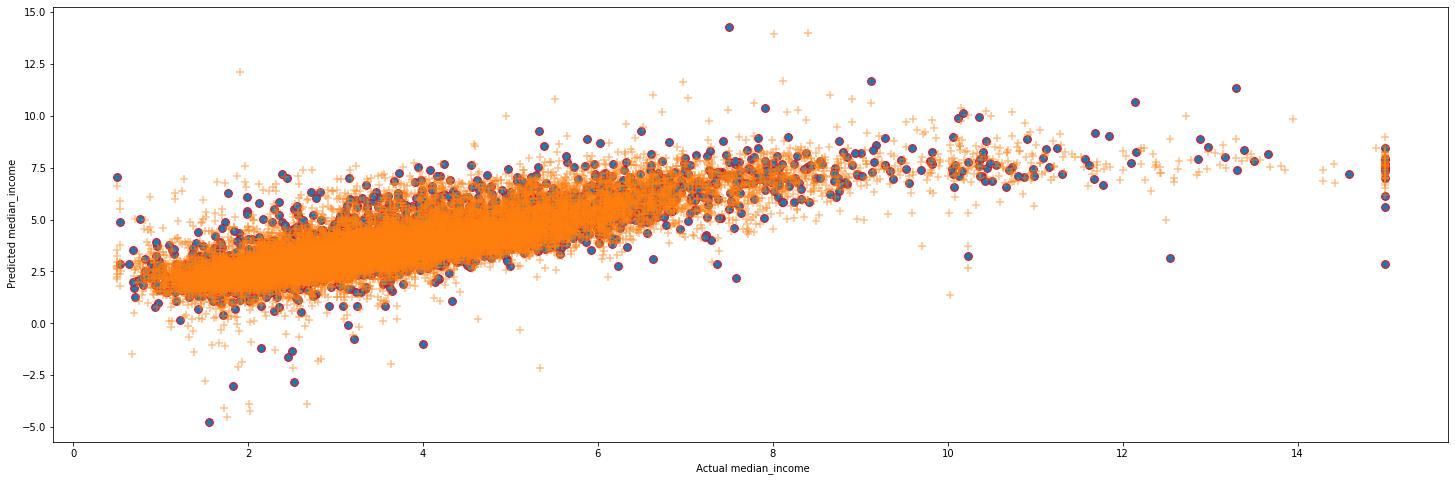

In [263]:
fig = plt.figure(figsize=(25,8))
plt.scatter(y_test2,y_pred2,marker="o",edgecolors ="r",s=60)
plt.scatter(y_train2,lin_model.predict(x_train2_sc),marker="+",s=50,alpha=0.5)
plt.xlabel(" Actual median_income")
plt.ylabel(" Predicted median_income")